In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype

# File to Load
file_to_load = "..\international_airline_activity_table1_2009tocurrent_1120.csv"

# Read flights file and store into Pandas dataframe
flights_data = pd.read_csv(file_to_load)
flights_data.head()

,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year,"<< This year is based on the month selected in cell H2 in sheet ""Totals"" - it is only a calendar year if the month in sheet ""Totals"" is set to December",Unnamed: 11
0,Jan-09,Aerolineas Argentinas,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009,NaN,NaN
1,Jan-09,Aerolineas Argentinas,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009,NaN,NaN
2,Jan-09,Air Caledonie,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009,NaN,NaN
3,Jan-09,Air Canada,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009,NaN,NaN
4,Jan-09,Air China,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009,NaN,NaN


In [2]:
# mail only dataframe
mail_data = flights_data[["Year", "Month", "Country to/from", "Mail In", "Mail Out"]]
mail_data.head()

,Year,Month,Country to/from,Mail In,Mail Out
0,2009,Jan-09,Argentina,0.6,0.0
1,2009,Jan-09,New Zealand,0.0,0.0
2,2009,Jan-09,New Caledonia,0.6,1.3
3,2009,Jan-09,Canada,0.0,0.0
4,2009,Jan-09,China,18.6,2.9


In [3]:
# cleaned dataframe changed Mail In/Out types as float 
clean_mail = mail_data.fillna(0)
cleanmail_to2020 = clean_mail.replace(['..'], '0')
cleanmail_to2020['Mail In'] = pd.to_numeric(cleanmail_to2020['Mail In'])
cleanmail_to2020['Mail Out'] = pd.to_numeric(cleanmail_to2020['Mail Out'])

# cleaned dataframe WITH 2020 data
cleanmail_to2020.tail()

,Year,Month,Country to/from,Mail In,Mail Out
15052,2020,Nov-20,Korea,0.0,0.0
15053,2020,Nov-20,Singapore,0.0,0.0
15054,2020,Nov-20,USA,0.0,0.0
15055,2020,Nov-20,Vietnam,0.0,8.8
15056,2020,Nov-20,China,6.6,0.0


In [4]:
# cleaned dataframe WITHOUT 2020 data
cleanmail_to2019 = cleanmail_to2020[~clean_mail["Year"].isin(["2020"])]
cleanmail_to2019.tail()

,Year,Month,Country to/from,Mail In,Mail Out
14009,2019,Nov-19,Tonga,0.0,0.0
14010,2019,Nov-19,USA,0.0,0.0
14011,2019,Nov-19,Vanuatu,0.0,0.0
14012,2019,Nov-19,Western Samoa,0.0,0.0
14013,2019,Nov-19,China,28.0,0.0


Text(0, 0.5, 'Total Mail')

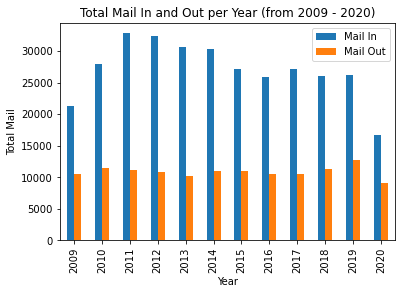

In [5]:
# 2009 - 2020 Total Mail In/Out data per Year
mail_in_to2020 = cleanmail_to2020.groupby(["Year"])["Mail In"].sum()
mail_out_to2020 = cleanmail_to2020.groupby(["Year"])["Mail Out"].sum()
index = cleanmail_to2020["Year"]
mail_2009to2020 = pd.DataFrame({'Mail In': mail_in_to2020,
                   'Mail Out': mail_out_to2020})
mail_2009to2020_plot = mail_2009to2020.plot.bar()
plt.title("Total Mail In and Out per Year (from 2009 - 2020)")
plt.xlabel("Year")
plt.ylabel("Total Mail")

In [6]:
# 2009 dataframe
mail_2009 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09'])]
# 2010 dataframe 
mail_2010 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10'])]
# 2011 dataframe 
mail_2011 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11'])]

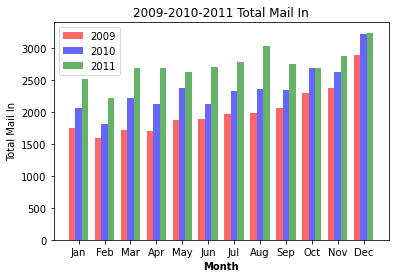

In [7]:
# 2009 Mail In data per Month 
mail_in_2009 = mail_2009.groupby(["Month"],sort=False)["Mail In"].sum()
# 2010 Mail In/Out data per Month
mail_in_2010 = mail_2010.groupby(["Month"],sort=False)["Mail In"].sum()
# 2011 Mail In/Out data per Month
mail_in_2011 = mail_2011.groupby(["Month"],sort=False)["Mail In"].sum()

barwidth = 0.25
# bar axis position
r1 = np.arange(len(mail_in_2011))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
# plot
plt.bar(r1, mail_in_2009, color='r', alpha=0.6, width=barwidth, label='2009')
plt.bar(r2, mail_in_2010, color='b', alpha=0.6, width=barwidth, label='2010')
plt.bar(r3, mail_in_2011, color='g', alpha=0.6, width=barwidth, label='2011')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(mail_in_2011))], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.title("2009-2010-2011 Total Mail In")
plt.xlabel("Month")
plt.ylabel("Total Mail In")

# First 3 years of the dataset (2009-2011) Year on Year comparison Mail In
plt.show()

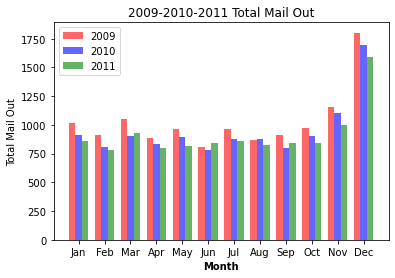

In [8]:
# 2009 Mail Out data per Month 
mail_out_2009 = mail_2009.groupby(["Month"],sort=False)["Mail Out"].sum()
# 2010 Mail In/Out data per Month
mail_out_2010 = mail_2010.groupby(["Month"],sort=False)["Mail Out"].sum()
# 2011 Mail In/Out data per Month
mail_out_2011 = mail_2011.groupby(["Month"],sort=False)["Mail Out"].sum()

barwidth = 0.25
# bar axis position
r1 = np.arange(len(mail_in_2010))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
# plot
plt.bar(r1, mail_out_2009, color='r', alpha=0.6, width=barwidth, label='2009')
plt.bar(r2, mail_out_2010, color='b', alpha=0.6, width=barwidth, label='2010')
plt.bar(r3, mail_out_2011, color='g', alpha=0.6, width=barwidth, label='2011')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(mail_in_2011))], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.title("2009-2010-2011 Total Mail Out")
plt.xlabel("Month")
plt.ylabel("Total Mail Out")

# First 3 years of the dataset (2009-2011) Year on Year comparison Mail Out
plt.show()

In [9]:
# 2017 dataframe 
mail_2017 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17'])]
# 2018 dataframe 
mail_2018 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18'])]
# 2019 dataframe 
mail_2019 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'])]


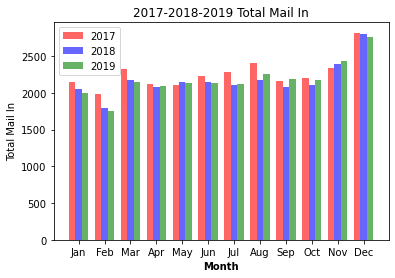

In [10]:
# 2017 Mail In data 
mail_in_2017 = mail_2017.groupby(["Month"],sort=False)["Mail In"].sum()
# 2018 Mail In data
mail_in_2018 = mail_2018.groupby(["Month"],sort=False)["Mail In"].sum()
# 2019 Mail In data
mail_in_2019 = mail_2019.groupby(["Month"],sort=False)["Mail In"].sum()

barwidth = 0.25
# bar axis position
r1 = np.arange(len(mail_in_2017))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
# plot
plt.bar(r1, mail_in_2017, color='r', alpha=0.6, width=barwidth, label='2017')
plt.bar(r2, mail_in_2018, color='b', alpha=0.6, width=barwidth, label='2018')
plt.bar(r3, mail_in_2019, color='g', alpha=0.6, width=barwidth, label='2019')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(mail_in_2011))], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.title("2017-2018-2019 Total Mail In")
plt.xlabel("Month")
plt.ylabel("Total Mail In")

# Last 3 years of the dataset before 2020 (2017-2019) Year on Year comparison Mail In
plt.show()

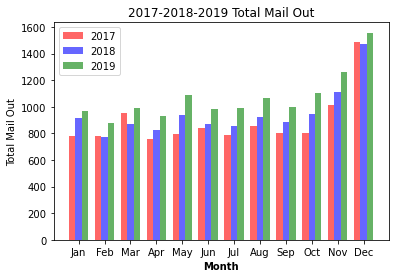

In [11]:
# 2017 Mail Out data
mail_out_2017 = mail_2017.groupby(["Month"],sort=False)["Mail Out"].sum()
# 2018 Mail Out data
mail_out_2018 = mail_2018.groupby(["Month"],sort=False)["Mail Out"].sum()
# 2019 Mail Out data (without December Data)
mail_out_2019 = mail_2019.groupby(["Month"],sort=False)["Mail Out"].sum()

barwidth = 0.25
# bar axis position
r1 = np.arange(len(mail_in_2019))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
# plot
plt.bar(r1, mail_out_2017, color='r', alpha=0.6, width=barwidth, label='2017')
plt.bar(r2, mail_out_2018, color='b', alpha=0.6, width=barwidth, label='2018')
plt.bar(r3, mail_out_2019, color='g', alpha=0.6, width=barwidth, label='2019')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(mail_in_2011))], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.title("2017-2018-2019 Total Mail Out")
plt.xlabel("Month")
plt.ylabel("Total Mail Out")

# Last 3 years of the dataset before 2020 (2017-2019) Year on Year comparison Mail Out
plt.show()

Text(0, 0.5, 'Total Mail')

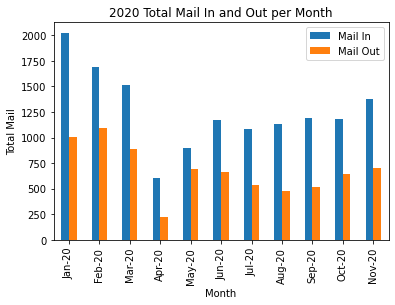

In [12]:
# 2020 dataframe 
mail_2020 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20'])]

# 2020 Mail In/Out data (without December Data)
mail_in_2020 = mail_2020.groupby(["Month"],sort=False)["Mail In"].sum()
mail_out_2020 = mail_2020.groupby(["Month"],sort=False)["Mail Out"].sum()
index = mail_2020["Month"]
mails_2020 = pd.DataFrame({'Mail In': mail_in_2020,
                   'Mail Out': mail_out_2020})

# 2020 Disruption in Mail In/Out 
mails_2020_plot = mails_2020.plot.bar()
plt.title("2020 Total Mail In and Out per Month")
plt.xlabel("Month")
plt.ylabel("Total Mail")

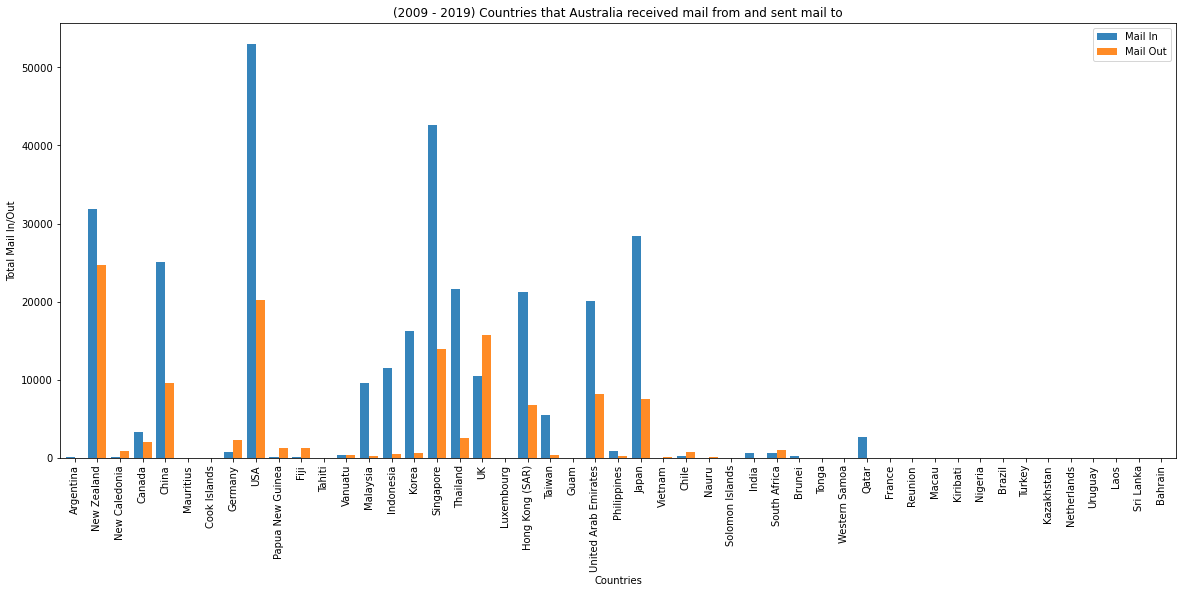

In [13]:
# Countries to and from (2009 - 2019) Mail In and Out over the 10 years prior to 2020 
grcountry_2009to2019 = cleanmail_to2019.groupby(["Country to/from"],sort=False).sum()
gcountries_2009to2019 = grcountry_2009to2019[["Mail In", "Mail Out"]]
gcountries_2009to2019.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("(2009 - 2019) Countries that Australia received mail from and sent mail to")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()

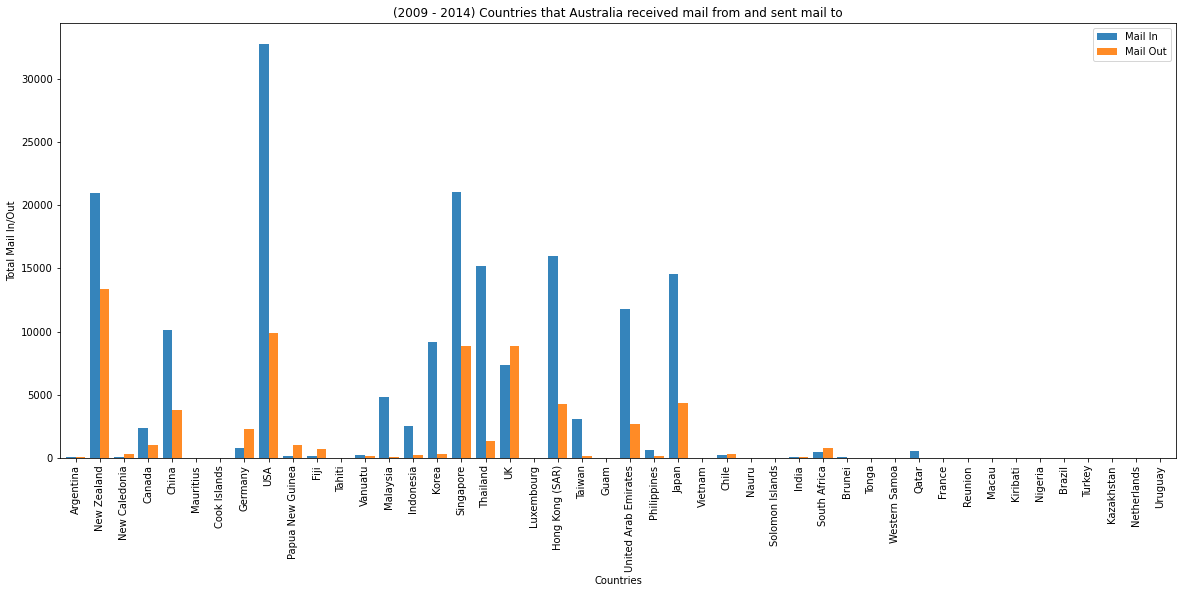

In [14]:
# Countries to and from (2009 - 2014) Mail In and Out for the First 6 years of the dataset
countries_2009to2014 = cleanmail_to2019[cleanmail_to2019["Year"].isin(["2009", "2010", "2011", "2012", "2013", "2014"])]
grcountry_2009to2014 = countries_2009to2014.groupby(["Country to/from"],sort=False).sum()
gcountries_2009to2014 = grcountry_2009to2014[["Mail In", "Mail Out"]]
gcountries_2009to2014.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("(2009 - 2014) Countries that Australia received mail from and sent mail to")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()

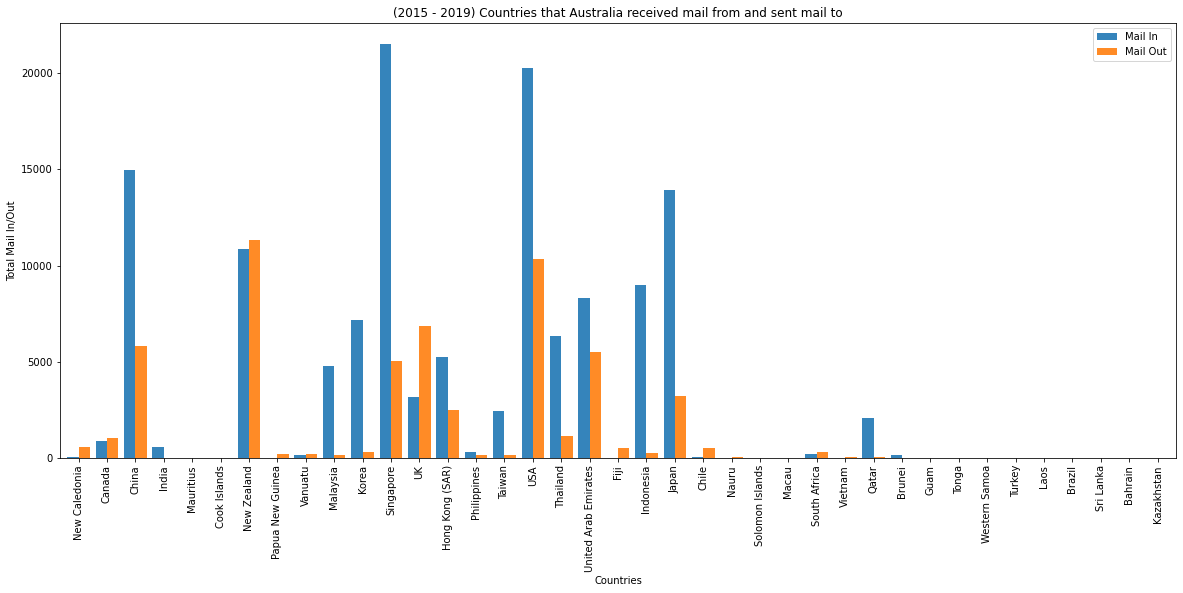

In [15]:
# Countries to and from (2015 - 2019) Mail In and Out over the 5 years before 2020
countries_2015to2019 = cleanmail_to2019[cleanmail_to2019["Year"].isin(["2015", "2016", "2017", "2018", "2019"])]
grcountry_2015to2019 = countries_2015to2019.groupby(["Country to/from"],sort=False).sum()
gcountries_2015to2019 = grcountry_2015to2019[["Mail In", "Mail Out"]]
gcountries_2015to2019.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("(2015 - 2019) Countries that Australia received mail from and sent mail to")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()

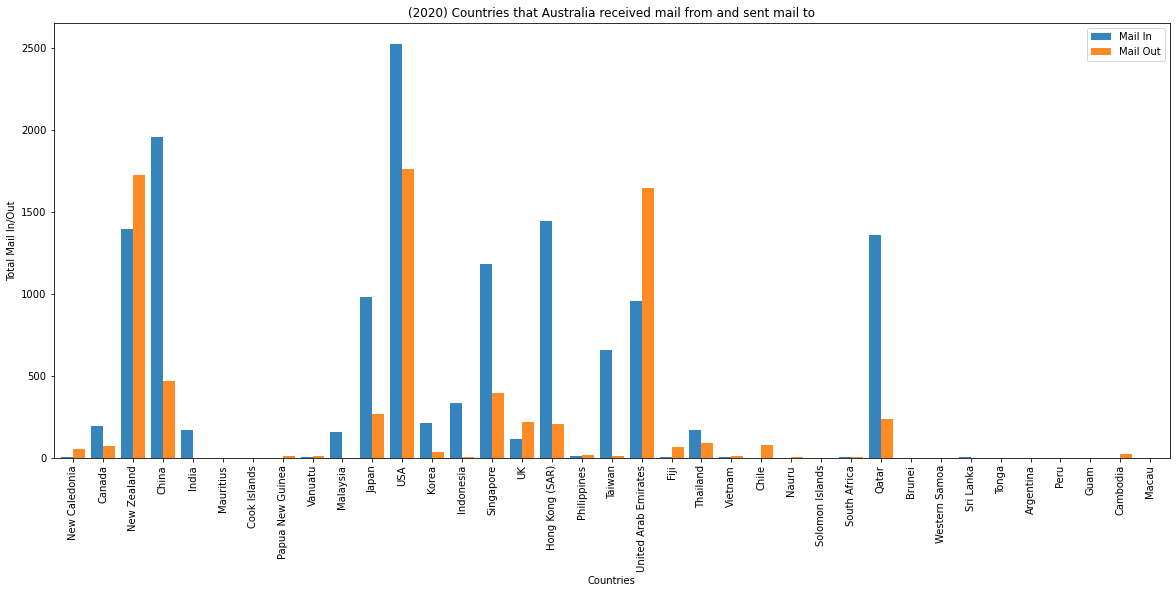

In [16]:
# Countries to and from - Mail In and Out Activity in 2020
countries_2020 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20'])]
grcountry_2020 = countries_2020.groupby(["Country to/from"],sort=False).sum()
gcountries_2020 = grcountry_2020[["Mail In", "Mail Out"]]
gcountries_2020.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("(2020) Countries that Australia received mail from and sent mail to")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()